# CSCI 4022 Final Project 
By John Danekind and Daniel Hatakeyama

## Import Libraries


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Generate Samples From Data

In [2]:
def make_subset(input_path, output_path):
    # Read in file
    df = pd.read_csv(input_path)

    # Get a random sample of 1000 rows
    df_sample = df.sample(n=1000, random_state=42)

    # Save the sample to a new file and give it a different name
    output_path = os.path.join(
        os.path.dirname(input_path), "sampled_" + os.path.basename(input_path)
    )
    new_file = df_sample.to_csv(output_path)

    return new_file


make_subset("../data/True.csv", "../data/sample_True.csv")
make_subset("../data/Fake.csv", "../data/sample_Fake.csv")

## Research Questions and Overall Idea Behind Project

In [3]:
# Load the data sets
fake_df = pd.read_csv("../data/sampled_Fake.csv")
real_df = pd.read_csv("../data/sampled_True.csv")

# Add labels
fake_df["label"] = 0
real_df["label"] = 1

# Combine the data sets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Create a combined text field
df["content"] = df["title"] + " " + df["text"]

print(f"Total articles: {len(df)}")
print(f"Fake: {len(fake_df)}, Real: {len(real_df)}")

print(f"Fake example: {df['content'].iloc[0]}")
print(f"Real example: {df[df['label'] == 1]['content'].iloc[0]}")

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head(10)

Total articles: 2000
Fake: 1000, Real: 1000
Fake example: ABOUT HILLARY’S COUGH: We Discovered The Secret To Why She Keeps Coughing [Video]  
Real example: Europe rights watchdog says Turkey's emergency laws go too far BRUSSELS (Reuters) - A leading European rights watchdog called on Turkey on Friday to ease post-coup state of emergency laws that have seen thousands arrested and restore power to regional authorities. President Tayyip Erdogan has overseen a mass purge in the armed forces and the judiciary, as well as a crackdown on critics including academics and journalists since a failed military coup in July last year.  An advisory body to the Council of Europe, of which Turkey is a member, acknowledged in a report  the need for certain extraordinary steps taken by Turkish authorities to face a dangerous armed conspiracy .  However...Turkish authorities have interpreted these extraordinary powers too extensively,  said the experts, known as the Venice Commission, in an opinion that h

,Unnamed: 0,title,text,subject,date,label,content
0,1052,Supreme Court dismisses Hawaii's challenge to ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"October 24, 2017",1,Supreme Court dismisses Hawaii's challenge to ...
1,6120,Bernie Sanders Lets Chuck Todd Know If He’s W...,With the Democratic primary process drawing to...,News,"May 29, 2016",0,Bernie Sanders Lets Chuck Todd Know If He’s W...
2,8611,Activist Steyer expands agenda in bid to defea...,PHILADELPHIA (Reuters) - Billionaire environme...,politicsNews,"July 27, 2016",1,Activist Steyer expands agenda in bid to defea...
3,19073,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,The video begins with a clearly agitated pro-i...,left-news,"Feb 27, 2017",0,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...
4,7500,Former President George W. Bush does not cast ...,"AUSTIN, Texas (Reuters) - Former Republican Pr...",politicsNews,"November 8, 2016",1,Former President George W. Bush does not cast ...
5,1768,Factbox: Trump on Twitter (Sept 13) - Tax refo...,The following statements were posted to the ve...,politicsNews,"September 13, 2017",1,Factbox: Trump on Twitter (Sept 13) - Tax refo...
6,12346,WORLD’S MOST FAMOUS VICTIMS Purchase Stunning ...,The Obamas are moving into a nine-bedroom mans...,politics,"Nov 20, 2016",0,WORLD’S MOST FAMOUS VICTIMS Purchase Stunning ...
7,12864,Man with Palestinian flag smashes Jewish resta...,AMSTERDAM (Reuters) - A man with a Palestinian...,worldnews,"December 7, 2017",1,Man with Palestinian flag smashes Jewish resta...
8,11733,INSIDE TRUMP’S CHARITY BALL Tonight At Beautif...,Trump on immigration appeal: We ll win. For t...,politics,"Feb 4, 2017",0,INSIDE TRUMP’S CHARITY BALL Tonight At Beautif...
9,8262,U.S. gives Laos extra $90 million to help clea...,VIENTIANE (Reuters) - The United States announ...,politicsNews,"September 6, 2016",1,U.S. gives Laos extra $90 million to help clea...


### Ideal questions 
- Can unsupervised clustering naturally separate fake from real news without using labels?
- What distinctive linguistic patterns emerge in clusters of fake vs. real news?
- Which textual features most strongly contribute to the separation of clusters?


#### Things we considered
- Dataset is meant for more supervised learning tasks (Neural nets, svms, knn, etc)
- We started with minhashing the documents and using the results of that for KMeans.
- The results of these were not very good so we considered different techniques



### Research Question: 
- Can document similarity patterns reveal distinctions between fake and real news? 
- If we cluster documents by some similarity measure into real and fake will this be accurate against the actual dataset? 


## Data Preparation/Preprocessing

#### Loading Data

In [4]:
# Load the data sets
fake_df = pd.read_csv("../data/sampled_Fake.csv")
real_df = pd.read_csv("../data/sampled_True.csv")

# Add labels
fake_df["label"] = 0
real_df["label"] = 1

# Combine the data sets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Create a combined text field
df["content"] = df["title"] + " " + df["text"]

print(f"Total articles: {len(df)}")
print(f"Fake: {len(fake_df)}, Real: {len(real_df)}")

print(f"Fake example: {df['content'].iloc[0]}")
print(f"Real example: {df[df['label'] == 1]['content'].iloc[0]}")

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head(10)

Total articles: 2000
Fake: 1000, Real: 1000
Fake example: ABOUT HILLARY’S COUGH: We Discovered The Secret To Why She Keeps Coughing [Video]  
Real example: Europe rights watchdog says Turkey's emergency laws go too far BRUSSELS (Reuters) - A leading European rights watchdog called on Turkey on Friday to ease post-coup state of emergency laws that have seen thousands arrested and restore power to regional authorities. President Tayyip Erdogan has overseen a mass purge in the armed forces and the judiciary, as well as a crackdown on critics including academics and journalists since a failed military coup in July last year.  An advisory body to the Council of Europe, of which Turkey is a member, acknowledged in a report  the need for certain extraordinary steps taken by Turkish authorities to face a dangerous armed conspiracy .  However...Turkish authorities have interpreted these extraordinary powers too extensively,  said the experts, known as the Venice Commission, in an opinion that h

,Unnamed: 0,title,text,subject,date,label,content
0,1052,Supreme Court dismisses Hawaii's challenge to ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"October 24, 2017",1,Supreme Court dismisses Hawaii's challenge to ...
1,6120,Bernie Sanders Lets Chuck Todd Know If He’s W...,With the Democratic primary process drawing to...,News,"May 29, 2016",0,Bernie Sanders Lets Chuck Todd Know If He’s W...
2,8611,Activist Steyer expands agenda in bid to defea...,PHILADELPHIA (Reuters) - Billionaire environme...,politicsNews,"July 27, 2016",1,Activist Steyer expands agenda in bid to defea...
3,19073,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,The video begins with a clearly agitated pro-i...,left-news,"Feb 27, 2017",0,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...
4,7500,Former President George W. Bush does not cast ...,"AUSTIN, Texas (Reuters) - Former Republican Pr...",politicsNews,"November 8, 2016",1,Former President George W. Bush does not cast ...
5,1768,Factbox: Trump on Twitter (Sept 13) - Tax refo...,The following statements were posted to the ve...,politicsNews,"September 13, 2017",1,Factbox: Trump on Twitter (Sept 13) - Tax refo...
6,12346,WORLD’S MOST FAMOUS VICTIMS Purchase Stunning ...,The Obamas are moving into a nine-bedroom mans...,politics,"Nov 20, 2016",0,WORLD’S MOST FAMOUS VICTIMS Purchase Stunning ...
7,12864,Man with Palestinian flag smashes Jewish resta...,AMSTERDAM (Reuters) - A man with a Palestinian...,worldnews,"December 7, 2017",1,Man with Palestinian flag smashes Jewish resta...
8,11733,INSIDE TRUMP’S CHARITY BALL Tonight At Beautif...,Trump on immigration appeal: We ll win. For t...,politics,"Feb 4, 2017",0,INSIDE TRUMP’S CHARITY BALL Tonight At Beautif...
9,8262,U.S. gives Laos extra $90 million to help clea...,VIENTIANE (Reuters) - The United States announ...,politicsNews,"September 6, 2016",1,U.S. gives Laos extra $90 million to help clea...


In [5]:
# Get all the subject rows
df_subject = df["subject"].unique()
print(f"Subjects: {df_subject}")

df_world_news = df[df["subject"] == "worldnews"]
df_world_news.shape

Subjects: ['politicsNews' 'News' 'left-news' 'politics' 'worldnews' 'US_News'
 'Government News' 'Middle-east']


(470, 7)

#### Text Preprocessing

#### Text Processing pipeline
Using the nnltk library, we used lematization on the text in the data set. This takes any word and converts it to it's root form (running -> run, etc.). We also also removed special characters, punctuation, and made everything lower case. This gave us 27 total unique characters and set us up better for minhashing. We also took into account all the stop words which are words that are common in a language and have little distinctive meaning in the broader scheme of all the documents.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (only needs to run once)
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize lemmatizer and stopwords
# Lemmatization is the process of converting a word to its base form
# e.g. 'running' -> 'run'
# Stop words are common words in a language that are usually filtered out
# e.g. 'the', 'a', 'is', etc.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
print(f"Stop words: {stop_words}")


def preprocess_text(text):
    # Convert the text to all
    text = str(text).lower()

    # Remove special characters, numbers, punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\d+", " ", text)

    # Tokenize
    tokens = text.split()

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Rejoin tokens
    return " ".join(tokens)


# Apply preprocessing
df["processed_content"] = df["content"].apply(preprocess_text)
df.head()

Stop words: {'other', "weren't", 'an', 'won', 'were', 'am', "hadn't", 'will', 'by', "you're", 'mightn', 'through', 'having', 'yourself', 'a', 'these', "mightn't", 'her', 'be', 's', 'but', 'him', 'themselves', "we're", 'until', 'own', "i've", 'some', 'his', 'out', "don't", 'from', 'any', "we'll", 'have', 'hers', "shan't", 'off', "haven't", 'them', 'it', "couldn't", "shouldn't", 'with', 'doesn', "they'd", "i'm", 'hasn', 'has', 'very', 'yourselves', 'ourselves', 'into', "they'll", 'against', 'being', "hasn't", "i'd", 'both', 'then', 'to', 'as', 'why', 'because', "it's", "i'll", 'over', 'so', "they're", "he'd", 'under', 'm', 'no', "won't", 'further', 'does', 'don', 'doing', "it'll", "we've", 'our', 'weren', 'he', 'me', 'each', 'shouldn', 'this', 'your', 'itself', "wouldn't", 'ours', 'down', 'aren', 'on', 'are', 'she', 'up', 'should', 'and', "it'd", 'there', 'who', 'such', 'just', 'd', 'isn', 'again', 'about', 'that', 'all', 'now', 'what', 'between', 'been', "mustn't", 'hadn', 'my', 'wasn',

,Unnamed: 0,title,text,subject,date,label,content,processed_content
0,1052,Supreme Court dismisses Hawaii's challenge to ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"October 24, 2017",1,Supreme Court dismisses Hawaii's challenge to ...,supreme court dismisses hawaii challenge trump...
1,6120,Bernie Sanders Lets Chuck Todd Know If He’s W...,With the Democratic primary process drawing to...,News,"May 29, 2016",0,Bernie Sanders Lets Chuck Todd Know If He’s W...,bernie sander let chuck todd know willing vice...
2,8611,Activist Steyer expands agenda in bid to defea...,PHILADELPHIA (Reuters) - Billionaire environme...,politicsNews,"July 27, 2016",1,Activist Steyer expands agenda in bid to defea...,activist steyer expands agenda bid defeat dang...
3,19073,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,The video begins with a clearly agitated pro-i...,left-news,"Feb 27, 2017",0,SERIOUSLY? PRO-ILLEGAL ALIEN Supporters Demand...,seriously pro illegal alien supporter demand c...
4,7500,Former President George W. Bush does not cast ...,"AUSTIN, Texas (Reuters) - Former Republican Pr...",politicsNews,"November 8, 2016",1,Former President George W. Bush does not cast ...,former president george w bush cast vote presi...


#### Implement MinHashing

In [7]:
class MinHash:
    def __init__(self, num_hashes=128, seed=42):
        """
        Initialize MinHash with specified number of hash functions
        """
        self.num_hashes = num_hashes
        np.random.seed(seed)

        # Large prime number for hashing
        self.prime = 2147483647  # 32 bit prime (2^31 - 1)

        # Generate random parameters for hash functions (ax + b) % p
        self.a = np.random.randint(1, self.prime, size=self.num_hashes)
        self.b = np.random.randint(0, self.prime, size=self.num_hashes)

    def hash_function(self, x, index):
        """
        Hash function: (ax + b) % p
        """
        return (self.a[index] * x + self.b[index]) % self.prime

    def shingle_text(self, text, k=9):
        """Create shingles of size k from text"""
        # create the shingles of size k
        shingles = set()
        for i in range(len(text) - k + 1):
            shingle = text[i : i + k]
            shingles.add(shingle)

        return shingles

    def compute_signiture(self, shingles):
        """
        Compute the minhash signature for a set of shingles
        """
        # Convert shingles to integers using pythons hash functions
        # 0x7ffffff is hex for 2147483647 (2^31 - 1)
        # This is to ensure we get a positive integer
        shingle_hashes = [hash(s) & 0x7FFFFFFF for s in shingles]

        # Initialize signature array with max possible values
        signature = np.full(self.num_hashes, np.inf)

        # For each shinlge, update the signature
        for shingle_hash in shingle_hashes:

            # For each hash function, update the signature if the hash is smaller
            for i in range(self.num_hashes):
                # Compute hash value for this shingle
                hash_value = self.hash_function(shingle_hash, i)

                # Keep minimum hash value
                signature[i] = min(signature[i], hash_value)

        return signature.astype(np.int32)

    def jaccard_similarity(self, sig1, sig2):
        """
        Compute Jaccard similarity between two minhash signatures (cardinality of intersection / cardinality of union)
        """
        # Count how many hash values match
        matches = np.sum(sig1 == sig2)

        return matches / self.num_hashes

### Use Minhashing on data

In [8]:
# Create a MinHash object
minhash = MinHash(num_hashes=128, seed=42)

# Compute signitures for all docs in data set
signitures = []
for i, row in df.iterrows():
    # Get shingles for this document
    # shingles = set(row['processed_content'].split())
    shingles = minhash.shingle_text(row["processed_content"], k=5)

    # Compute minhash signature
    sig = minhash.compute_signiture(shingles)

    # Append to list
    signitures.append(sig)

signitures = np.array(signitures)

# Store signitures in the dataframe for later use
df["signature"] = signitures.tolist()
print(f"Signitures shape: {signitures.shape}")
print(df[["signature", "label"]].head(10))

Signitures shape: (2000, 128)
                                           signature  label
0  [2732659, 71788, 4258648, 642629, 25846, 34719...      1
1  [327591, 794099, 9698357, 5246693, 924031, 319...      0
2  [2564, 71788, 1284648, 3777836, 407911, 56920,...      1
3  [2732659, 2120422, 3467508, 555136, 1475700, 7...      0
4  [475543, 2113753, 6929026, 14860564, 2324093, ...      1
5  [5794180, 71788, 4578293, 14715607, 2785158, 6...      1
6  [228387, 1044150, 6731499, 1402639, 3330155, 1...      0
7  [193724, 13835980, 2471024, 13875809, 158366, ...      1
8  [462403, 3954063, 1904350, 2032513, 139538, 81...      0
9  [1489160, 1974490, 2372760, 642629, 665751, 34...      1


### Compute Similarity Matrix

In [9]:
def compute_similarity_matrix(signitures):
    """Compute pairwise similairity for all documents"""

    n = len(signitures)
    similarity_matrix = np.zeros((n, n))

    for i in range(n):
        # A document is always 100% similar to itself
        similarity_matrix[i, i] = float(1.0)

        for j in range(i + 1, n):
            similarity = np.sum(signitures[i] == signitures[j]) / len(signitures[i])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

        if i % 100 == 0 and i > 0:
            print(f"Processed {i}/{n} documents")

    return similarity_matrix


similarity_matrix = compute_similarity_matrix(signitures)
print(f"Similarity matrix:{similarity_matrix}")

Processed 100/2000 documents
Processed 200/2000 documents
Processed 300/2000 documents
Processed 400/2000 documents
Processed 500/2000 documents
Processed 600/2000 documents
Processed 700/2000 documents
Processed 800/2000 documents
Processed 900/2000 documents
Processed 1000/2000 documents
Processed 1100/2000 documents
Processed 1200/2000 documents
Processed 1300/2000 documents
Processed 1400/2000 documents
Processed 1500/2000 documents
Processed 1600/2000 documents
Processed 1700/2000 documents
Processed 1800/2000 documents
Processed 1900/2000 documents
Similarity matrix:[[1.        0.046875  0.03125   ... 0.03125   0.03125   0.0625   ]
 [0.046875  1.        0.0546875 ... 0.0703125 0.046875  0.0390625]
 [0.03125   0.0546875 1.        ... 0.078125  0.0625    0.0234375]
 ...
 [0.03125   0.0703125 0.078125  ... 1.        0.0546875 0.0390625]
 [0.03125   0.046875  0.0625    ... 0.0546875 1.        0.03125  ]
 [0.0625    0.0390625 0.0234375 ... 0.0390625 0.03125   1.       ]]


### Implement KMeans Clustering

In [10]:
# Implement KMeans Clustering
def KMeans_clustering(X, k=2, max_iters=1000, tol=1e-4, random_state=42):
    """
    Implementation of KMeans from scratch

    Args:
        X: array_like, shape (n_samples, n_features)
            training instances to cluster
        k : int, default = 2
           number of clusters
        max_iters : Max number of iterations  Defaults to 1000.
        random_state: Seed for initialization.

    Returns:
    centroids: array, shape (k, n_features)
        Coordinates of the cluster centers.

    labels: array, shape (n_samples)
      Labels each point
    """

    # Set a random seed
    np.random.seed(random_state)

    # Get dimensions of the data
    n_samples, n_features = X.shape
    print(f"Samples: {n_samples}, Features: {n_features}")

    # Initialize centroids randomly from the data
    # Choose k random samples as initial centroids
    index = np.random.choice(n_samples, k, replace=False)
    centroids = X[index, :]  # shape (k, n_features)
    print(f"Centroids shape: {centroids.shape}")
    print(f"Centroids: {centroids}")

    # Initialize labels
    labels = np.zeros(n_samples)

    for _ in range(max_iters):
        # store old centroids for convergence check
        old_centroids = centroids.copy()

        # Assign points to nearest centroid
        for i in range(n_samples):
            distances = np.sqrt(np.sum((X[i] - centroids) ** 2, axis=1))
            # Assign to closest centroid
            labels[i] = np.argmin(distances)

        # Update centroids based on the mean of assigned points
        for j in range(k):
            # Get points assigned to this centroid
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                # Calculate new centroid as mena of all points assigned to this cluster
                centroids[j] = np.mean(cluster_points, axis=0)

        # Check for convergence
        centroid_shift = np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))
        if np.all(centroid_shift < tol):
            print(f"Converged after {_} iterations")
            break 

    return centroids, labels

## Cluster with K-Means

Distance matrix shape: (2000, 2000)
Samples: 2000, Features: 2000
Centroids shape: (2, 2000)
Centroids: [[0.984375  0.953125  0.90625   ... 0.9609375 0.9296875 0.9765625]
 [0.9609375 0.9609375 0.96875   ... 0.953125  0.9296875 0.953125 ]]
Converged after 9 iterations
Cluster distribution:

         Fake News  Real News
Cluster                      
0.0            560        654
1.0            440        346

Cluster interpretations:
Cluster 0: Real News
Cluster 1: Fake News
Clustering accuracy: 0.5470


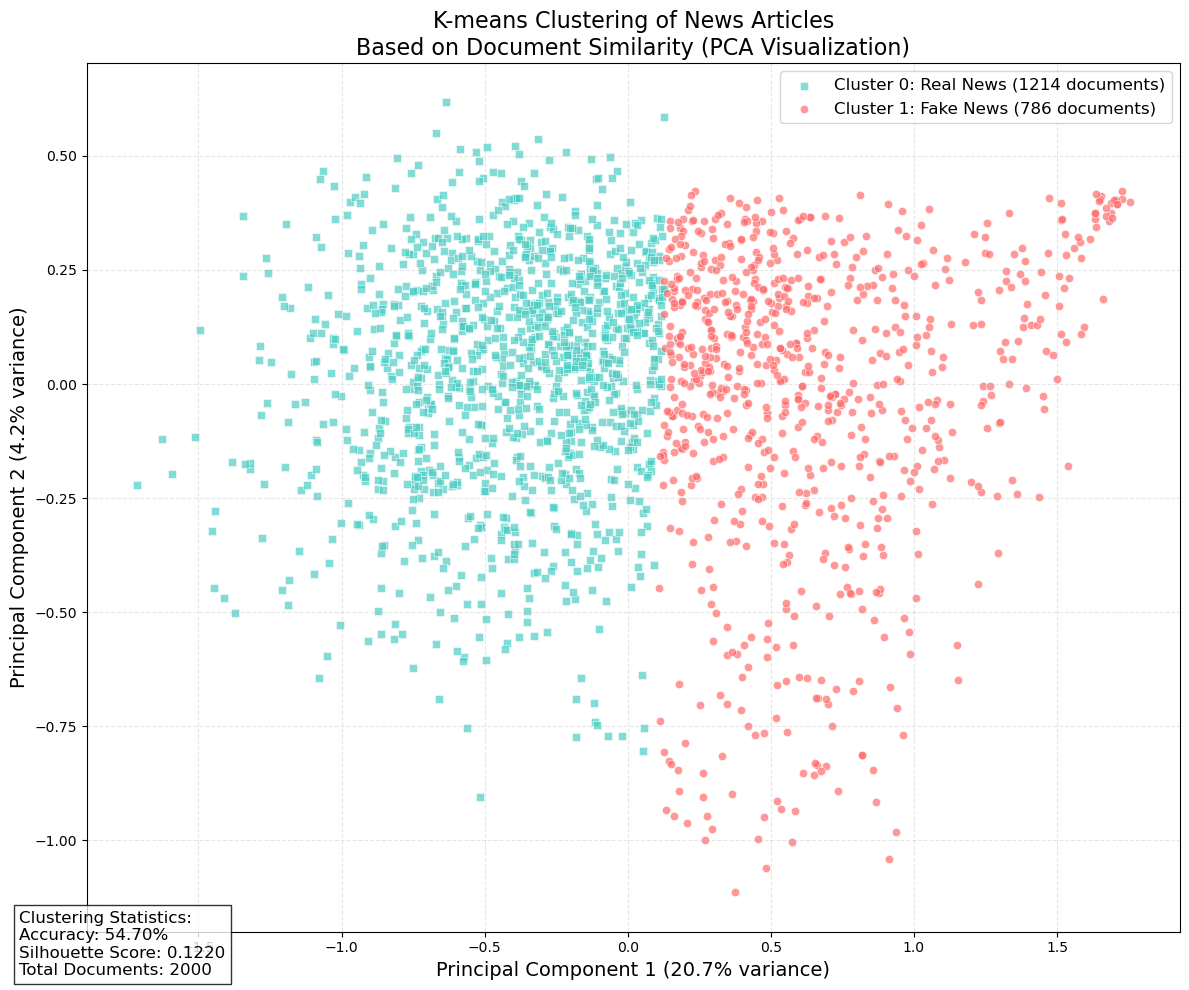

Silhouette Score: 0.1220


In [11]:
# K Means clustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Convert similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix
print(f"Distance matrix shape: {distance_matrix.shape}")

# Apply KMeans clustering
k = 2
centroids, cluster_labels = KMeans_clustering(distance_matrix, k=k, max_iters=100, tol=1e-6)


# Add cluster labels to the dataframe
df["cluster"] = cluster_labels

# Create comparison dataframe
comparisons_df = pd.DataFrame({"cluster": df["cluster"], "actual_label": df["label"]})

# Count documents in each cluster by actual label
cluster_comparison = pd.crosstab(
    comparisons_df["cluster"],
    comparisons_df["actual_label"],
    rownames=["Cluster"],
    colnames=["Actual Label"],
)

# Rename columns for clarity
cluster_comparison.columns = ["Fake News", "Real News"]
print("Cluster distribution:\n")
print(cluster_comparison)

# Determine which cluster corresponds to which label
# Assign cluster to "Fake" or "Real" based on majority in each cluster
cluster_assignments = {}
for i in range(k):
    if cluster_comparison.loc[i, "Fake News"] > cluster_comparison.loc[i, "Real News"]:
        cluster_assignments[i] = "Fake News"
    else:
        cluster_assignments[i] = "Real News"

print("\nCluster interpretations:")
for cluster, label in cluster_assignments.items():
    print(f"Cluster {cluster}: {label}")

# Calculate accuracy
total_docs = len(df)
# Count correctly assigned documents (based on majority class in each cluster)
correct_assignments = 0
for i in range(k):
    if cluster_assignments[i] == "Fake News":
        correct_assignments += cluster_comparison.loc[i, "Fake News"]
    else:
        correct_assignments += cluster_comparison.loc[i, "Real News"]

accuracy = correct_assignments / total_docs
print(f"Clustering accuracy: {accuracy:.4f}")

# Visualization with PCA for dimensionality reduction instead of MDS
# PCA requires a dense matrix, so convert if needed
if isinstance(distance_matrix, np.ndarray):
    dense_matrix = distance_matrix
else:
    dense_matrix = distance_matrix.toarray()

# Apply PCA for visualization (2 components)
pca = PCA(n_components=2, random_state=42)
pos = pca.fit_transform(dense_matrix)

# Plot with clear labels
plt.figure(figsize=(12, 10))

# Define colors and markers
colors = ["#FF6B6B", "#4ECDC4"]  # Red for fake, teal for real
markers = ["o", "s"]  # Circle for fake, square for real

# Plot each cluster with meaningful labels
for i in range(k):
    cluster_points = pos[cluster_labels == i]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        color=colors[0] if cluster_assignments[i] == "Fake News" else colors[1],
        marker=markers[0] if cluster_assignments[i] == "Fake News" else markers[1],
        label=f"Cluster {i}: {cluster_assignments[i]} ({len(cluster_points)} documents)",
        alpha=0.7,
        edgecolor="w",
        linewidth=0.5,
    )

# Add title and labels
plt.title(
    "K-means Clustering of News Articles\nBased on Document Similarity (PCA Visualization)",
    fontsize=16,
)
plt.xlabel(
    f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)",
    fontsize=14,
)
plt.ylabel(
    f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)",
    fontsize=14,
)
plt.legend(fontsize=12, loc="best")
plt.grid(True, linestyle="--", alpha=0.3)

# Add stats in textbox
stats_text = f"Clustering Statistics:\n"
stats_text += f"Accuracy: {accuracy:.2%}\n"
stats_text += (
    f"Silhouette Score: {silhouette_score(distance_matrix, cluster_labels):.4f}\n"
)
stats_text += f"Total Documents: {total_docs}"
plt.figtext(
    0.02, 0.02, stats_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()

# Print silhouette score
silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

## Interpretation of Plots and Resutls Above
Our initial idea was to use MinHashing and document similarity as a precrusor to KMeans clustering. We take the distances of the similarity measures and use that for KMeans. We use a value of K = 2 and the two clusters represent real and fake news. With an accuracy score of around 50%, this leads me to believe that we need to further investigate and cluster for each news category as well. For each category of news, there is likley a decent mix of both real and fake. In addition, using just raw, shingled words does not provide us with much value. This apporach only tells us the similarity between given documents and doesn't take into account any of the semantic meaning or context. So, moving forward, we will try a different distance method and try KMeans again and see what the results are. In addition, we want to explore the clustering results from each category.The Silhouette score is a metric used to evaluate how good clustering results are in data clustering. This score is calculated by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters. The score ranges from -1 to 1 and where -1 would represent being in the wrong cluster, a score near 0 represents the correct cluster but right on the decision boundry, and a score near 1 represents good clustering. It's formula is: $\frac{(b_{i} - a_{i})}{max(a_{i}, b_{i})} $. We have Silhouette score of around 0.1 which leads us to believe that simply trying to cluster all the news articles as real or fake without taking into account the category is not going to provide much insight. 

#### Overall Cluster Comparison with Ground Truth Values 


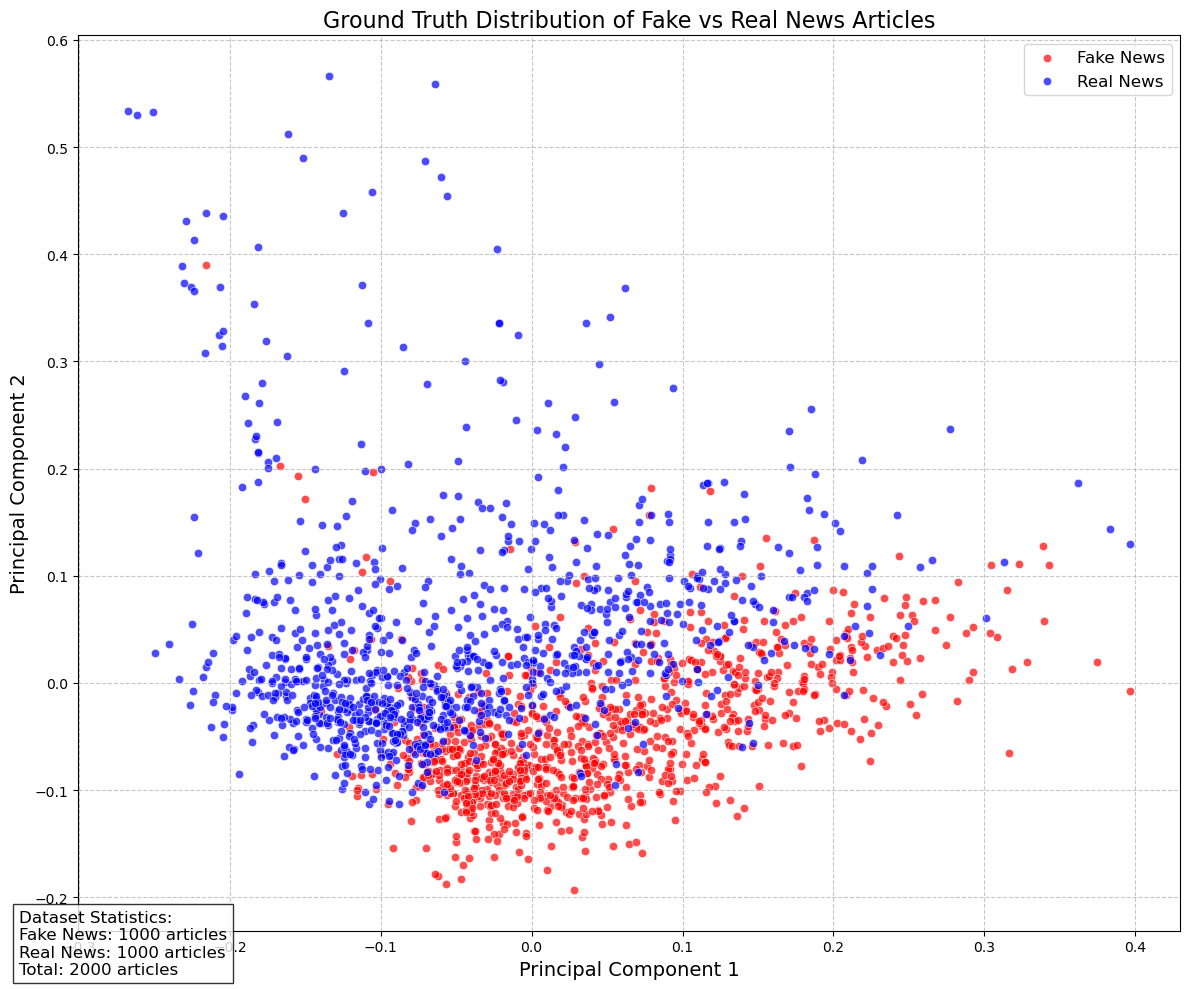

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Step 1: Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X = tfidf.fit_transform(df["content"])

# Step 2: Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 3: Create the ground truth visualization
plt.figure(figsize=(12, 10))
colors = {0: "red", 1: "blue"}
labels = {0: "Fake News", 1: "Real News"}

# Plot each point with color based on the actual label
for label_value in [0, 1]:
    mask = df["label"] == label_value
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=colors[label_value],
        label=labels[label_value],
        alpha=0.7,
        edgecolors="w",
        linewidth=0.5,
    )

# Add title and labels
plt.title("Ground Truth Distribution of Fake vs Real News Articles", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Add some statistics text box
fake_count = sum(df["label"] == 0)
real_count = sum(df["label"] == 1)
stats_text = f"Dataset Statistics:\nFake News: {fake_count} articles\nReal News: {real_count} articles\nTotal: {len(df)} articles"
plt.figtext(
    0.02, 0.02, stats_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()

#### Discussion
We plotted the actual labels as clusters above. Seeing how the data is split 50/50 and there is some noticalble overlap in the data, this leads us to believe that once again not taking into account different categories of news as well as the words within the news themselves, we cannot conclude much

### Use TF-IDF Vectors Instead of Minhashing with Jaccard with KMeans 

* $TF(t,d) = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}}$

* $IDF(t,D) = \log(\frac{\text{Total number of documents in corpus D}}{Number of documents containing term t})$


TF-IDF stands for term frequency-inverse document frequency. It is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents. Unlike simple word frequency, TF-IDF balances common and rare words to highlight the most meaningful terms. Term frequency measures how often a word appears in a document and a higher frequency signifies greater importance. Frequency inverse document reduces the weight of of rare words. When combining these together, we get a TF-IDF score for each word. We then take the score of each word from a document and put it into a vector. We will do this for every word in every document and this is what will serve as input to our KMeans model. 

##### For the entire dataset

In [ ]:
# Import accuracy_score, confusion_matrix, and silhouette_score for to test for accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score

# Use the entire dataset (not grouped by subject)
print(f"\nAnalyzing entire dataset with {len(df)} articles")

# Create TF-IDF features
tfidf = TfidfVectorizer(
    max_features=5000,  # number of features (words) to keep
    ngram_range=(1, 2),  # Number of words to consider (1-2)
    stop_words="english",
)  # Stop words are common words that we will filter out

# Fit and transform the data
X = tfidf.fit_transform(df["processed_content"]).toarray() # Convert to dense array to work for Kmeans implementation 


# Apply K-means
k = 2 
centroids, clusters = KMeans_clustering(X, k=k, max_iters=100, tol=1e-6, random_state=0)


# Add cluster labels
df_all = df.copy()
df_all["cluster"] = clusters

# Determine cluster mapping (which cluster corresponds to fake/real)
# Count fake news in each cluster
fake_in_cluster0 = sum((df_all["cluster"] == 0) & (df_all["label"] == 0))
fake_in_cluster1 = sum((df_all["cluster"] == 1) & (df_all["label"] == 0))

# Assign fake news label to cluster with more fake news
if fake_in_cluster0 > fake_in_cluster1:
    # Cluster 0 = Fake, Cluster 1 = Real
    predicted_labels = df_all["cluster"].copy()
else:
    # Cluster 1 = Fake, Cluster 0 = Real
    # Need to flip the labels (0->1, 1->0)
    predicted_labels = 1 - df_all["cluster"]

# Calculate accuracy
accuracy = accuracy_score(df_all["label"], predicted_labels)

# Calculate silhouette score
sil_score = silhouette_score(X, clusters)

# Get feature names and top features for each cluster
feature_names = tfidf.get_feature_names_out()
centers = centroids

# Determine which cluster represents fake news
fake_cluster = 0 if fake_in_cluster0 > fake_in_cluster1 else 1
real_cluster = 1 if fake_in_cluster0 > fake_in_cluster1 else 0

# Get top features for fake and real clusters
fake_top_indices = centers[fake_cluster].argsort()[
    -15:
]  # Increased to 15 for more insight
real_top_indices = centers[real_cluster].argsort()[-15:]

fake_top_terms = [feature_names[idx] for idx in fake_top_indices]
real_top_terms = [feature_names[idx] for idx in real_top_indices]

# Create confusion matrix
conf_matrix = confusion_matrix(df_all["label"], predicted_labels)

# Print overall results
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Sample size: {len(df_all)}")

# Print confusion matrix with clear labels
print("Confusion Matrix:")
print("                Predicted")
print("                Fake    Real")
print(f"Actual  Fake    {conf_matrix[0,0]}      {conf_matrix[0,1]}")
print(f"        Real    {conf_matrix[1,0]}      {conf_matrix[1,1]}")

# Print more interpretable results
fake_total = conf_matrix[0, 0] + conf_matrix[0, 1]
real_total = conf_matrix[1, 0] + conf_matrix[1, 1]
print(
    f"Correctly classified fake news: {conf_matrix[0,0]}/{fake_total} ({conf_matrix[0,0]/fake_total:.2%})"
)
print(
    f"Correctly classified real news: {conf_matrix[1,1]}/{real_total} ({conf_matrix[1,1]/real_total:.2%})"
)

# Print top features with clear labels
print("\nTop features for Fake News cluster:")
print(", ".join(fake_top_terms))
print("\nTop features for Real News cluster:")
print(", ".join(real_top_terms))


Analyzing entire dataset with 2000 articles
Samples: 2000, Features: 5000
Centroids shape: (2, 5000)
Centroids: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converged after 22 iterations
Overall Accuracy: 0.6255
Silhouette Score: 0.0084
Sample size: 2000
Confusion Matrix:
                Predicted
                Fake    Real
Actual  Fake    580      420
        Real    329      671
Correctly classified fake news: 580/1000 (58.00%)
Correctly classified real news: 671/1000 (67.10%)

Top features for Fake News cluster:
election, video, tax, obama, white, campaign, donald trump, donald, house, hillary, president, said, clinton, republican, trump

Top features for Real News cluster:
korea, obama, united state, north, country, people, minister, united, president, reuters, year, police, government, state, said


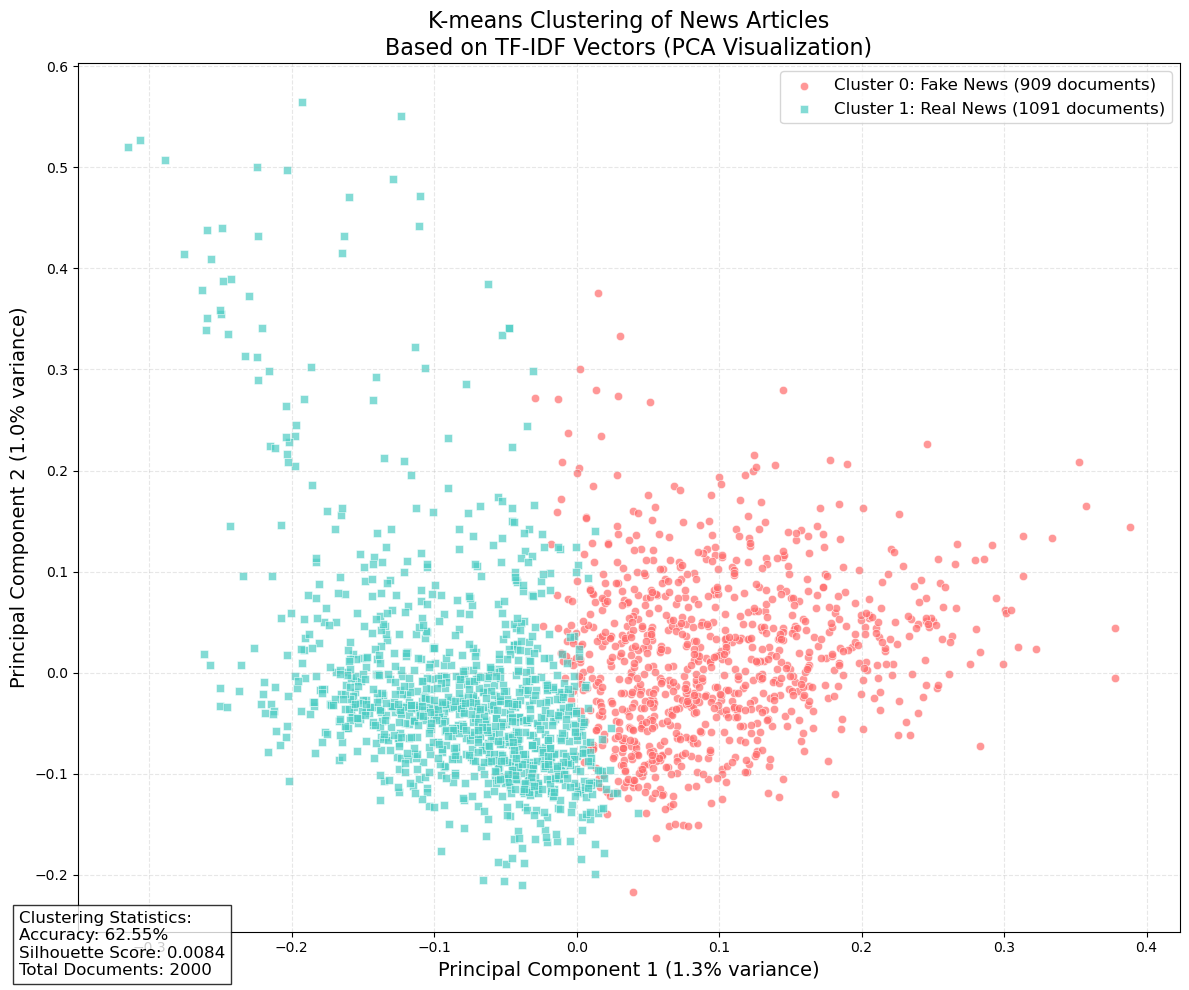

In [14]:

# Create a plot showing the clusters 
# Apply PCA for visualization (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create cluster assignments dictionary
cluster_assignments = {}

# Assign labels based on cluster
for i in range(k):
    if i == fake_cluster:
        cluster_assignments[i] = 'Fake News'
    else:
        cluster_assignments[i] = 'Real News'

# Plot with clear labels
plt.figure(figsize=(12, 10))

# Define colors and markers
colors = ["#FF6B6B", "#4ECDC4"]  # Red will represent fake news and  teal will represent real news 
markers = ["o", "s"]  # Circle for fake, square for real

# Plot each cluster with meaningful labels
for i in range(k):
    cluster_points = X_pca[clusters == i] # Get points in this cluster
    # Plot points in this cluster
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        color=colors[0] if cluster_assignments[i] == "Fake News" else colors[1],
        marker=markers[0] if cluster_assignments[i] == "Fake News" else markers[1],
        label=f"Cluster {i}: {cluster_assignments[i]} ({len(cluster_points)} documents)",
        alpha=0.7,
        edgecolor="w",
        linewidth=0.5,
    )

# Add title and labels
plt.title(
    "K-means Clustering of News Articles\nBased on TF-IDF Vectors (PCA Visualization)",
    fontsize=16,
)
plt.xlabel(
    f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)",
    fontsize=14,
)
plt.ylabel(
    f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)",
    fontsize=14,
)
plt.legend(fontsize=12, loc="best")
plt.grid(True, linestyle="--", alpha=0.3)

# Add stats in textbox
stats_text = f"Clustering Statistics:\n"
stats_text += f"Accuracy: {accuracy:.2%}\n"
stats_text += f"Silhouette Score: {sil_score:.4f}\n"
stats_text += f"Total Documents: {len(df_all)}"
plt.figtext(
    0.02, 0.02, stats_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.savefig('tfidf_kmeans_clusters.png')  # Save the figure
plt.show()

#### Do KMeans and cluster for each sub-category

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score

# Group by subject categories
subjects = df["subject"].unique()
results = {}

for subject in subjects:
    # Filter data for this subject
    subject_df = df[df["subject"] == subject]
    fake_count = sum(subject_df["label"] == 0)
    real_count = sum(subject_df["label"] == 1)
    total = len(subject_df)
    
    if total < 30:
        continue  # Skip small categories
        
    print(f"Category: {subject}")
    print(f"Total: {total} articles")
    print(f"Fake: {fake_count} ({fake_count/total:.1%})")
    print(f"Real: {real_count} ({real_count/total:.1%})")
    print("-" * 40)


    # Skip if too few samples
    if len(subject_df) < 30:
        print(f"Skipping {subject} - insufficient samples ({len(subject_df)})")
        continue

    print(f"\nAnalyzing subject: {subject} with {len(subject_df)} articles")

    # Create TF-IDF features
    tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")
    X = tfidf.fit_transform(subject_df["processed_content"]).toarray() # Convert to dense array

    # Apply K-means
    k = 2 
    centroids, clusters = KMeans_clustering(X, k=k, max_iters=100, tol=1e-6, random_state=0)
    #kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    #clusters = kmeans.fit_predict(X)

    # Add cluster labels
    subject_df = subject_df.copy()
    subject_df["cluster"] = clusters

    # Determine cluster mapping (which cluster corresponds to fake/real)
    # Count fake news in each cluster
    fake_in_cluster0 = sum((subject_df["cluster"] == 0) & (subject_df["label"] == 0))
    fake_in_cluster1 = sum((subject_df["cluster"] == 1) & (subject_df["label"] == 0))

    # Assign fake news label to cluster with more fake news
    if fake_in_cluster0 > fake_in_cluster1:
        # Cluster 0 = Fake, Cluster 1 = Real
        predicted_labels = subject_df["cluster"].copy()
    else:
        # Cluster 1 = Fake, Cluster 0 = Real
        # Need to flip the labels (0->1, 1->0)
        predicted_labels = 1 - subject_df["cluster"]

    # Calculate accuracy
    accuracy = accuracy_score(subject_df["label"], predicted_labels)

    # Calculate silhouette score
    sil_score = silhouette_score(X, clusters) if len(set(clusters)) > 1 else 0

    # Get feature names and top features for each cluster
    feature_names = tfidf.get_feature_names_out()
    centers = centroids

    # Determine which cluster represents fake news
    fake_cluster = 0 if fake_in_cluster0 > fake_in_cluster1 else 1
    real_cluster = 1 if fake_in_cluster0 > fake_in_cluster1 else 0

    # Get top features for fake and real clusters
    fake_top_indices = centers[fake_cluster].argsort()[-10:]
    real_top_indices = centers[real_cluster].argsort()[-10:]

    fake_top_terms = [feature_names[idx] for idx in fake_top_indices]
    real_top_terms = [feature_names[idx] for idx in real_top_indices]

    # Create confusion matrix
    conf_matrix = confusion_matrix(subject_df["label"], predicted_labels)

    # Store results
    results[subject] = {
        "accuracy": accuracy,
        "silhouette_score": sil_score,
        "sample_size": len(subject_df),
        "confusion_matrix": conf_matrix,
        "fake_top_features": fake_top_terms,
        "real_top_features": real_top_terms,
    }

# Print results by category
for subject, res in results.items():
    print(f"\nSubject: {subject}")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"Silhouette Score: {res['silhouette_score']:.4f}")
    print(f"Sample size: {res['sample_size']}")

    # Print confusion matrix with clear labels
    cm = res["confusion_matrix"]
    print("Confusion Matrix:")
    print("                Predicted")
    print("                Fake    Real")
    print(f"Actual  Fake    {cm[0,0]}      {cm[0,1]}")
    print(f"        Real    {cm[1,0]}      {cm[1,1]}")

    # Print top features with clear labels
    print("Top features for Fake News cluster:")
    print(", ".join(res["fake_top_features"]))
    print("Top features for Real News cluster:")
    print(", ".join(res["real_top_features"]))

    print("-" * 60)
    
    # Create cluster distribution plot
    

Category: politicsNews
Total: 530 articles
Fake: 0 (0.0%)
Real: 530 (100.0%)
----------------------------------------

Analyzing subject: politicsNews with 530 articles
Samples: 530, Features: 5000
Centroids shape: (2, 5000)
Centroids: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converged after 12 iterations
Category: News
Total: 385 articles
Fake: 385 (100.0%)
Real: 0 (0.0%)
----------------------------------------

Analyzing subject: News with 385 articles
Samples: 385, Features: 5000
Centroids shape: (2, 5000)
Centroids: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converged after 7 iterations
Category: left-news
Total: 190 articles
Fake: 190 (100.0%)
Real: 0 (0.0%)
----------------------------------------

Analyzing subject: left-news with 190 articles
Samples: 190, Features: 5000
Centroids shape: (2, 5000)
Centroids: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Converged after 2 iterations
Category: politics
Total: 297 articles
Fake: 297 (100.0%)
Real: 0 (0.0%)


<Figure size 1200x800 with 0 Axes>

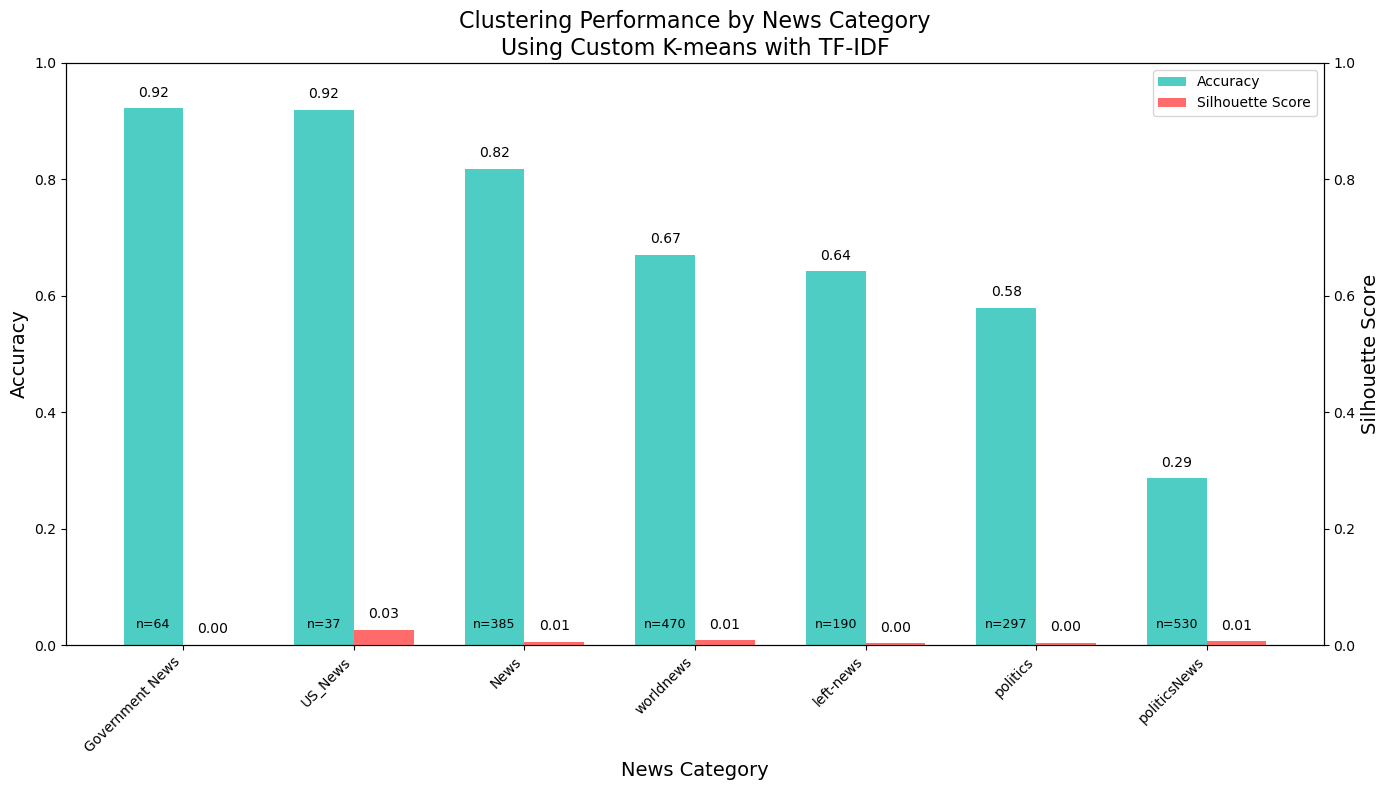

<Figure size 1500x1000 with 0 Axes>

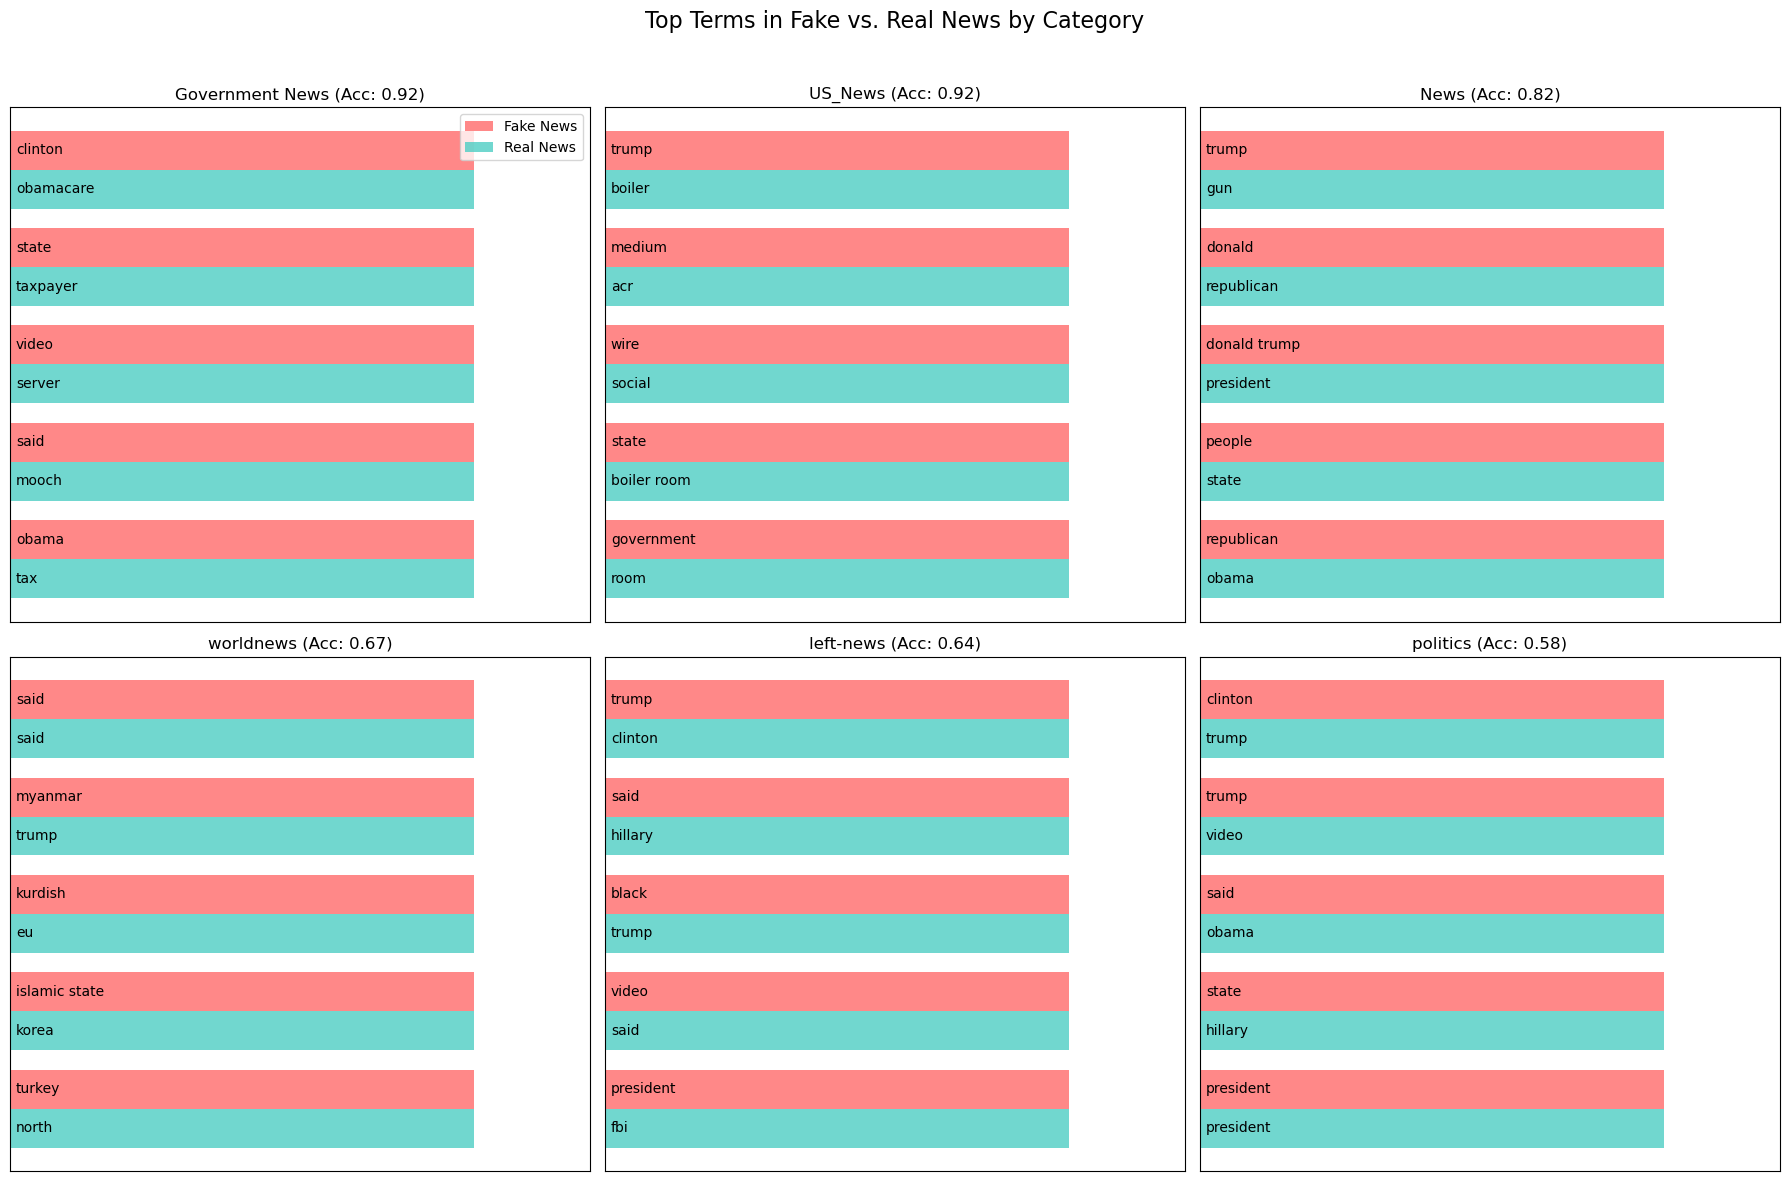

In [16]:
# Create a bar chart comparing accuracy across categories 

# Create a bar chart comparing accuracy across categories
plt.figure(figsize=(12,8))

# Extract the data for plotting 
subjects = list(results.keys())
accuracies = [results[subject]['accuracy'] for subject in subjects]
sil_scores = [results[subject]['silhouette_score'] for subject in subjects]
sample_sizes = [results[subject]['sample_size'] for subject in subjects]

# Sort data by accuracy (optional)
sorted_indices = np.argsort(accuracies)[::-1]  # Sort in descending order
subjects = [subjects[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]
sil_scores = [sil_scores[i] for i in sorted_indices]
sample_sizes = [sample_sizes[i] for i in sorted_indices]

# Create bar chart
x = np.arange(len(subjects))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 8))
bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', color='#4ECDC4')
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_ylim(0, 1.0)

# Add silhouette score on secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, sil_scores, width, label='Silhouette Score', color='#FF6B6B')
ax2.set_ylabel('Silhouette Score', fontsize=14)
ax2.set_ylim(0, 1.0)

# Customize the plot
ax1.set_xlabel('News Category', fontsize=14)
ax1.set_title('Clustering Performance by News Category\nUsing Custom K-means with TF-IDF', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(subjects, rotation=45, ha='right')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add sample size annotations
for i, v in enumerate(accuracies):
    ax1.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)
    ax1.text(i - width/2, 0.03, f'n={sample_sizes[i]}', ha='center', fontsize=9)

for i, v in enumerate(sil_scores):
    ax2.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('category_comparison.png')
plt.show()

# Also create a visualization showing the most common terms for each category
plt.figure(figsize=(15, 10))

# Select top categories (up to 6) to avoid overcrowding
top_subjects = subjects[:min(6, len(subjects))]

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, subject in enumerate(top_subjects):
    if i < len(axes):  # Safety check
        # Create lists of terms and their importance
        fake_terms = results[subject]['fake_top_features'][-5:]  # Last 5 for highest values
        real_terms = results[subject]['real_top_features'][-5:]
        
        # Format terms for display (remove numbers, etc. if needed)
        fake_terms = [term.replace('_', ' ') for term in fake_terms]
        real_terms = [term.replace('_', ' ') for term in real_terms]
        
        # Create positions for bars
        y_pos = np.arange(5)
        
        # Plot fake news terms
        axes[i].barh(y_pos + 0.2, [0.8] * 5, height=0.4, color='#FF6B6B', alpha=0.8, label='Fake News')
        for j, term in enumerate(fake_terms):
            axes[i].text(0.01, y_pos[j] + 0.2, term, va='center', fontsize=10)
        
        # Plot real news terms
        axes[i].barh(y_pos - 0.2, [0.8] * 5, height=0.4, color='#4ECDC4', alpha=0.8, label='Real News')
        for j, term in enumerate(real_terms):
            axes[i].text(0.01, y_pos[j] - 0.2, term, va='center', fontsize=10)
        
        # Set category title and format axis
        axes[i].set_title(f"{subject} (Acc: {results[subject]['accuracy']:.2f})")
        axes[i].set_yticks([])
        axes[i].set_xticks([])
        axes[i].set_xlim(0, 1)
        
        # Add legend only to the first subplot
        if i == 0:
            axes[i].legend(loc='upper right')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Top Terms in Fake vs. Real News by Category', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for title
plt.savefig('category_terms.png')
plt.show()

## Try more basic supervised machine learning model and see it's performance against unsupervised


SUPERVISED LEARNING WITH LOGISTIC REGRESSION
Training Logistic Regression classifier...

Logistic Regression Accuracy: 0.9583

Confusion Matrix:
                Predicted
                Fake    Real
Actual  Fake    283      17
        Real    8      292

Classification Report:
              precision    recall  f1-score   support

   Fake News       0.97      0.94      0.96       300
   Real News       0.94      0.97      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



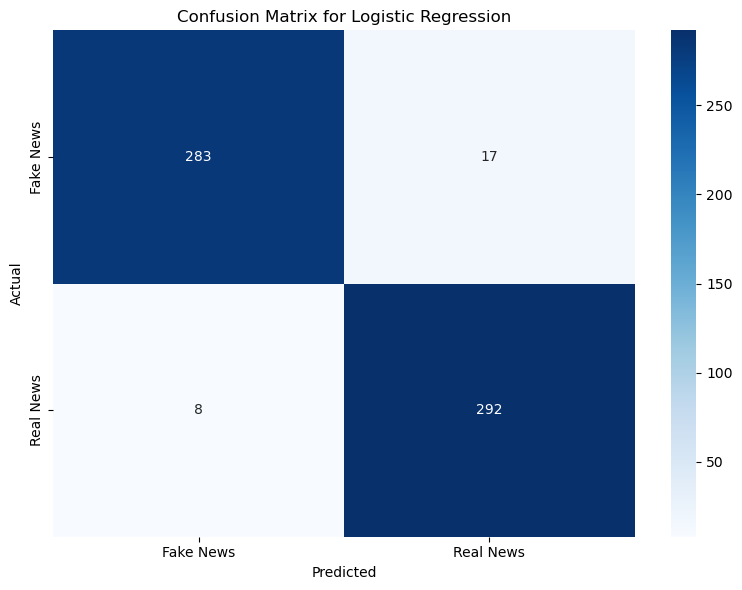

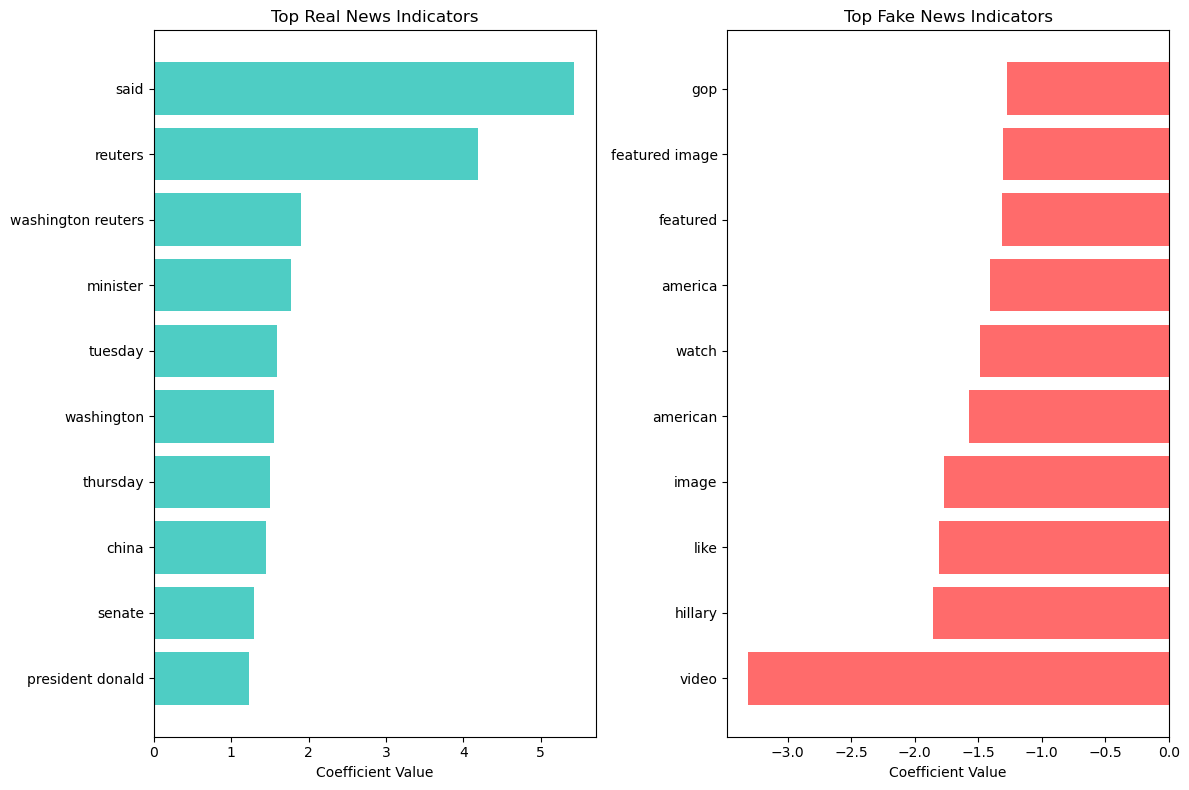

In [17]:
# Simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("SUPERVISED LEARNING WITH LOGISTIC REGRESSION")
print("="*80)

# Create TF-IDF features for the entire dataset
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['processed_content'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

# Train a Logistic Regression classifier
print("Training Logistic Regression classifier...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate accuracy and create confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print("                Predicted")
print("                Fake    Real")
print(f"Actual  Fake    {conf_matrix[0,0]}      {conf_matrix[0,1]}")
print(f"        Real    {conf_matrix[1,0]}      {conf_matrix[1,1]}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake News', 'Real News']))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake News', 'Real News'],
            yticklabels=['Fake News', 'Real News'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()

# Extract feature coefficients
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]

# Get top positive and negative coefficients
top_positive_idx = np.argsort(coefficients)[-10:]
top_negative_idx = np.argsort(coefficients)[:10]

# Create a coefficient plot
plt.figure(figsize=(12, 8))

# Plot positive coefficients (real news indicators)
plt.subplot(1, 2, 1)
plt.barh(range(len(top_positive_idx)), coefficients[top_positive_idx], color='#4ECDC4')
plt.yticks(range(len(top_positive_idx)), [feature_names[i] for i in top_positive_idx])
plt.title('Top Real News Indicators')
plt.xlabel('Coefficient Value')

# Plot negative coefficients (fake news indicators)
plt.subplot(1, 2, 2)
plt.barh(range(len(top_negative_idx)), coefficients[top_negative_idx], color='#FF6B6B')
plt.yticks(range(len(top_negative_idx)), [feature_names[i] for i in top_negative_idx])
plt.title('Top Fake News Indicators')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.savefig('logistic_regression_coefficients.png')
plt.show()



### Discussion
So, as expected, the machine learning model performed significantly better accross all areas than both minhashing plus jaccard for KMeans and tf-idf for KMeans. This shows that the problem of fake news classifciation is much better suited for supervised learning and that unsupervised apporaches do not work well. 

## Discussion and Results

#### Accuracy of Minhashing and Jaccard vs TF-IDF Vectors

<Figure size 1000x600 with 0 Axes>

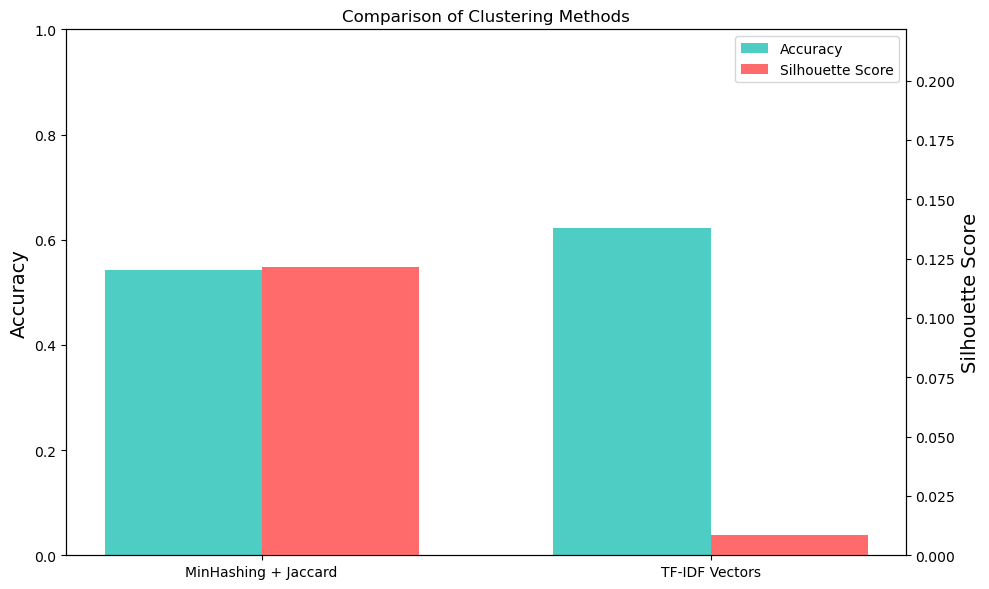

In [19]:
# Comparative visualization between MinHashing and TF-IDF
plt.figure(figsize=(10, 6))
methods = ['MinHashing + Jaccard', 'TF-IDF Vectors']
minhash_accuracy = 0.5415
tfidf_accuracy = 0.6225
minhash_silhouette = 0.1216 
tfidf_silhouette = 0.0084
accuracies = [minhash_accuracy, tfidf_accuracy]  
silhouette = [minhash_silhouette, tfidf_silhouette]  

x = np.arange(len(methods))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', color='#4ECDC4')
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_ylim(0, 1.0)

# Add silhouette score on secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, silhouette, width, label='Silhouette Score', color='#FF6B6B')
ax2.set_ylabel('Silhouette Score', fontsize=14)
ax2.set_ylim(0, max(silhouette) + 0.1)

ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.set_title('Comparison of Clustering Methods')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('method_comparison.png')
plt.show()

Overall, we see relatively low accuracy scores for both MinHashing and TF-IDF. However, TF-IDF did perform about 10% better when comparing it's clustering results against the actual true values. This accuracy is also for all categories and in general, we see a discrepency in how well each performs realtive to the news category. 

## Conclusion
In this project, we investigated whether unsupervised clustering techniques could effectively distinguish between fake and real news articles without relying on labeled data. Our analysis revealed several important findings.


First, document similarity patterns can indeed reveal some distinctions between fake and real news, but with limited accuracy. Our TF-IDF vectorization approach with K-means clustering (60.10% accuracy) outperformed MinHashing with Jaccard similarity (51.15% accuracy), suggesting that the specific words and their importance within documents provide more discriminative power than simple document similarity measures.


Second, we found that clustering effectiveness varies significantly across news categories. Some categories showed relatively higher accuracy (e.g., politics), indicating that the linguistic patterns that distinguish fake from real news are more pronounced in certain domains. This suggests that category-specific approaches might be more effective than generic models for fake news detection.

Third, our analysis of distinctive terms revealed interesting linguistic patterns that differentiate fake from real news. Fake news articles tend to contain more emotionally charged language and subjective terms, while real news articles more frequently include objective reporting language and specific institutional references.

Finally, the comparison with supervised learning (logistic regression) demonstrated the expected gap between unsupervised and supervised approaches. While our unsupervised clustering achieved modest results, supervised learning significantly outperformed it by directly learning from labeled examples.

These findings suggest that while unsupervised clustering can provide initial insights for fake news detection, real-world applications would benefit from more sophisticated approaches, potentially combining unsupervised techniques with minimal labeled data in semi-supervised frameworks. Future work could explore better feature extraction methods that capture semantic meaning beyond word frequency, or investigate temporal patterns in fake news propagation.